# Movie Data Analysis

In [10]:
import pandas as pd
import sqlite3
import zipfile
import matplotlib.pyplot as plt

In [11]:
# upzip im.db.zip file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    zipObj.extractall(path='./zippedData/')
    

In [12]:
con = sqlite3.connect('zippedData/im.db')
cursor = con.cursor()


In [13]:
# check table names
schema_df = pd.read_sql("""
                        SELECT *
                        FROM sqlite_master """, con)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Trying to find if there is any correlations between the budgets and ratings of the movies. There are three data frames I need, movie_raitng and movie_basics from im.db database as well as the budget from tn.movie_budgets.csv.gz.

In [14]:

df_rating = pd.read_sql("""
                        SELECT *
                        FROM movie_ratings """, con)
df_rating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [15]:
df_basics = pd.read_sql("""
                        SELECT 
                            movie_id,
                        FROM movie_basics """, con)
df_basics.head()

DatabaseError: Execution failed on sql '
                        SELECT 
                            movie_id,
                        FROM movie_basics ': near "FROM": syntax error

In [16]:
# Join two tables together, with both movie_id, movie name and averagerating
movie_titles_rating = pd.read_sql("""
                                    SELECT 
                                        movie_ratings.movie_id, movie_basics.primary_title AS movie, movie_ratings.averagerating 
                                    FROM 
                                        movie_ratings
                                        INNER JOIN movie_basics
                                            ON movie_ratings.movie_id = movie_basics.movie_id
                                    
                                    """, con)
movie_titles_rating.head(50)

,movie_id,movie,averagerating
0,tt10356526,Laiye Je Yaarian,8.3
1,tt10384606,Borderless,8.9
2,tt1042974,Just Inès,6.4
3,tt1043726,The Legend of Hercules,4.2
4,tt1060240,Até Onde?,6.5
5,tt1069246,Habana Eva,6.2
6,tt1094666,The Hammer,7.0
7,tt1130982,The Night Clerk,6.4
8,tt1156528,Silent Sonata,7.2
9,tt1161457,Vanquisher,4.2


Now I have a clean table to check both movie name and it corresponding rating. Next, I'm going to join this table with budget info.

In [17]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [18]:
df_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
# df_budgets.sort_values(by='production_budget')

In [ ]:
# df_budgets['production_budget'][0][0]

In [19]:
budget_rating_df = pd.merge(movie_titles_rating,df_budgets, on='movie')
budget_rating_df.head(50)

,movie_id,movie,averagerating,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt1043726,The Legend of Hercules,4.2,42,"Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319"
1,tt1094666,The Hammer,7.0,50,"Mar 21, 2008","$850,000","$442,638","$442,638"
2,tt3096900,The Hammer,6.5,50,"Mar 21, 2008","$850,000","$442,638","$442,638"
3,tt1171222,Baggage Claim,5.1,38,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836"
4,tt1210166,Moneyball,7.6,15,"Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835"
5,tt1212419,Hereafter,6.5,61,"Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270"
6,tt1232829,21 Jump Street,7.2,44,"Mar 16, 2012","$42,000,000","$138,447,667","$202,812,429"
7,tt1243974,Aloha,5.4,3,"May 29, 2015","$37,000,000","$21,052,030","$25,387,091"
8,tt1261945,Sex and the City 2,4.4,16,"May 27, 2010","$95,000,000","$95,347,692","$294,680,778"
9,tt1270761,Don't Be Afraid of the Dark,5.6,43,"Aug 26, 2011","$25,000,000","$24,046,682","$39,126,427"


In [20]:
budget_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   movie              2875 non-null   object 
 2   averagerating      2875 non-null   float64
 3   id                 2875 non-null   int64  
 4   release_date       2875 non-null   object 
 5   production_budget  2875 non-null   object 
 6   domestic_gross     2875 non-null   object 
 7   worldwide_gross    2875 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 202.1+ KB


KeyError: 'budgets'

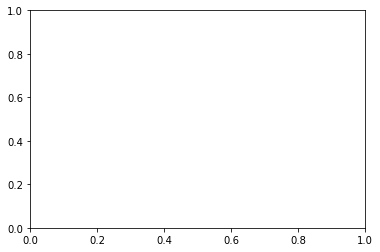

In [21]:
fig, ax = plt.subplots()
ax.scatter(x=budget_rating_df['budgets'], y=budget_rating_df['averagerating'])
ax.set_xlabel('budgets (USD)')
ax.set_ylabel('averagerating')

## Clean Budgets Table

In [22]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [23]:
"""All the numbers in this table need to be converted to integers"""

df_budgets['budgets(USD)'] = df_budgets['production_budget'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['dom_gross(USD)'] = df_budgets['domestic_gross'].str.replace('$','').str.replace(',', '').astype(int)
df_budgets['world_gross(USD)'] = df_budgets['worldwide_gross'].str.replace('$','').str.replace(',', '').astype('int64')

In [24]:
df_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budgets(USD),dom_gross(USD),world_gross(USD)
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000,620181382,1316721747


In [25]:
# keep the int columns only
budget_clean = df_budgets.drop(['production_budget','domestic_gross','worldwide_gross'], axis=1)

In [26]:
budget_clean.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


## Join movie_basics and budget_clean

In [27]:
# load movie_basics from the database
df_basics = pd.read_sql("""
                        SELECT 
                            movie_id, primary_title AS movie, genres, runtime_minutes
                        FROM 
                            movie_basics """, con)

In [28]:
df_basics.loc[df_basics['movie']=='Avatar']

,movie_id,movie,genres,runtime_minutes
17060,tt1775309,Avatar,Horror,93.0


In [29]:
#
movie_budget = budget_clean.merge(df_basics, on='movie')

In [ ]:
movie_budget.head(50)

In [ ]:
movie_budget.info()

In [ ]:
# check nan in genres
# movie_budget.loc[movie_budget['genres'].isna()]

In [30]:
# add a new column "Estimated Profit"
movie_budget['Estimated Profit'] = movie_budget['world_gross(USD)']-movie_budget['budgets(USD)']

In [31]:
movie_budget.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,1072413963
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200


In [32]:
df_directors = pd.read_sql("""
                        SELECT 
                            *
                        FROM 
                            directors """, con)
df_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [33]:
df_person = pd.read_sql("""
                        SELECT 
                            *
                        FROM 
                            persons """, con)
df_person.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [34]:
director_df = pd.read_sql("""
                            SELECT
                                d.movie_id, p.primary_name AS director_name
                            FROM 
                                directors AS d
                                INNER JOIN persons AS p
                                    ON d.person_id = p.person_id
                                """, con)
director_df.head()

,movie_id,director_name
0,tt0285252,Tony Vitale
1,tt0462036,Bill Haley
2,tt0835418,Jay Chandrasekhar
3,tt0835418,Jay Chandrasekhar
4,tt0878654,Albert Pyun


In [35]:
director_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291171 entries, 0 to 291170
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   movie_id       291171 non-null  object
 1   director_name  291171 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [36]:
movie_df = movie_budget.merge(director_df, on='movie_id', how='inner')

In [37]:
movie_df.drop_duplicates(subset='movie_id',keep='first', inplace=True)

In [38]:
movie_clean_df = movie_df.drop_duplicates(subset='movie',keep='first')

In [39]:
movie_clean_df

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279,Atsushi Wada
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,635063875,Rob Marshall
7,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650,Simon Kinberg
13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,1072413963,Joss Whedon
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200,Anthony Russo
...,...,...,...,...,...,...,...,...,...,...,...
8971,68,"Jul 6, 2001",Cure,10000,94596,94596,tt1872026,Drama,93.0,84596,Bill Yip
8973,70,"Apr 1, 1996",Bang,10000,527,527,tt6616538,None,NaN,-9473,Zarina Tadjibaeva
8977,73,"Jan 13, 2012",Newlyweds,9000,4584,4584,tt1880418,"Comedy,Drama",95.0,-4416,Edward Burns
8978,78,"Dec 31, 2018",Red 11,7000,0,0,tt7837402,"Horror,Sci-Fi,Thriller",77.0,-7000,Robert Rodriguez


In [40]:
movie_clean_df['Estimated Profit'] = movie_clean_df['world_gross(USD)']-movie_clean_df['budgets(USD)']

<ipython-input-40-336117b4f84c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_clean_df['Estimated Profit'] = movie_clean_df['world_gross(USD)']-movie_clean_df['budgets(USD)']


In [41]:
movie_clean_df.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279,Atsushi Wada
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,635063875,Rob Marshall
7,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650,Simon Kinberg
13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,1072413963,Joss Whedon
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200,Anthony Russo


##Working with Movie Table and Runtime Minutes (Cleaned version with no duplicates) 

In [43]:
#Drop rows that are missing runtime_minutes values
movie_clean_df = movie_clean_df.dropna(subset=["runtime_minutes"])
#Check that the runtime_minutes has no missing values
movie_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 8980
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2144 non-null   int64  
 1   release_date      2144 non-null   object 
 2   movie             2144 non-null   object 
 3   budgets(USD)      2144 non-null   int64  
 4   dom_gross(USD)    2144 non-null   int64  
 5   world_gross(USD)  2144 non-null   int64  
 6   movie_id          2144 non-null   object 
 7   genres            2138 non-null   object 
 8   runtime_minutes   2144 non-null   float64
 9   Estimated Profit  2144 non-null   int64  
 10  director_name     2144 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 201.0+ KB


In [44]:
#Find mean number of runtime_minutes for all movies in dataset
movie_clean_df["runtime_minutes"].mean()

102.05923507462687

In [45]:
#find mean number of runtime_minutes for all profitable movies in dataset
#create data frame of profitable movies
profitable_movie_df = movie_clean_df[movie_clean_df["Estimated Profit"] > 0]

In [46]:
profitable_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 8971
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1342 non-null   int64  
 1   release_date      1342 non-null   object 
 2   movie             1342 non-null   object 
 3   budgets(USD)      1342 non-null   int64  
 4   dom_gross(USD)    1342 non-null   int64  
 5   world_gross(USD)  1342 non-null   int64  
 6   movie_id          1342 non-null   object 
 7   genres            1339 non-null   object 
 8   runtime_minutes   1342 non-null   float64
 9   Estimated Profit  1342 non-null   int64  
 10  director_name     1342 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 125.8+ KB


In [59]:
profitable_movie_df.sort_values(by = "Estimated Profit", ascending = False)
profitable_movie_df.head(20)

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279,Atsushi Wada
2,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,"Action,Adventure,Fantasy",136.0,635063875,Rob Marshall
13,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,"Action,Adventure,Sci-Fi",141.0,1072413963,Joss Whedon
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200,Anthony Russo
42,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,tt0974015,"Action,Adventure,Fantasy",120.0,355945209,Zack Snyder
52,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,tt2379713,"Action,Adventure,Thriller",148.0,579620923,Sam Mendes
57,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1084439099,tt1345836,"Action,Thriller",164.0,809439099,Christopher Nolan
61,12,"May 25, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,tt3778644,"Action,Adventure,Fantasy",135.0,118151347,Ron Howard
67,14,"Mar 9, 2012",John Carter,275000000,73058679,282778100,tt0401729,"Action,Adventure,Sci-Fi",132.0,7778100,Andrew Stanton
71,15,"Nov 24, 2010",Tangled,260000000,200821936,586477240,tt0398286,"Adventure,Animation,Comedy",100.0,326477240,Nathan Greno


In [86]:
#find the mean and median runtime of the profitable movies
profitable_movie_df["runtime_minutes"].mean()

104.5387481371088

In [87]:
profitable_movie_df["runtime_minutes"].median()

104.0

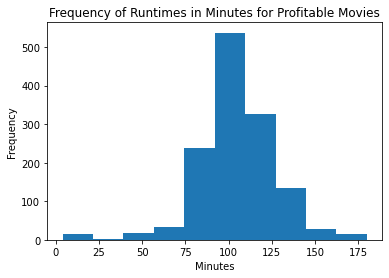

In [49]:
# create histogram of runtime_minutes
fig, ax = plt.subplots()

ax.hist(profitable_movie_df["runtime_minutes"])
ax.set_title("Frequency of Runtimes in Minutes for Profitable Movies")
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency");

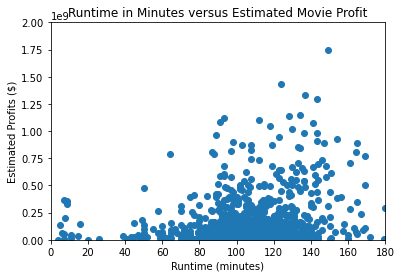

In [89]:
#Create scatter plot to see if there is a correlation between runtime and profitability

fig, ax = plt.subplots()
x = profitable_movie_df["runtime_minutes"]
y = profitable_movie_df["Estimated Profit"]
ax.scatter(x, y)
ax.set(xlim = (0, 180), ylim = (0, 2000000000), 
            title = "Runtime in Minutes versus Estimated Movie Profit",
            xlabel = "Runtime (minutes)",
            ylabel = "Estimated Profits ($)");
                                    

In [90]:
##Create an unprofitable movie data frame and see how it compares

In [62]:
unprofitable_movies_df = movie_clean_df[movie_clean_df["Estimated Profit"] < 0]
unprofitable_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 7 to 8980
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                802 non-null    int64  
 1   release_date      802 non-null    object 
 2   movie             802 non-null    object 
 3   budgets(USD)      802 non-null    int64  
 4   dom_gross(USD)    802 non-null    int64  
 5   world_gross(USD)  802 non-null    int64  
 6   movie_id          802 non-null    object 
 7   genres            799 non-null    object 
 8   runtime_minutes   802 non-null    float64
 9   Estimated Profit  802 non-null    int64  
 10  director_name     802 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 75.2+ KB


In [98]:
least_profitable_movies_df = unprofitable_movies_df.sort_values(by = ["Estimated Profit"])[0:100]
least_profitable_movies_df.head()

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name
7,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,tt6565702,"Action,Adventure,Sci-Fi",113.0,-200237650,Simon Kinberg
789,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,tt1305591,"Adventure,Animation,Family",88.0,-110450242,Simon Wells
1312,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,tt2283336,"Action,Adventure,Comedy",115.0,-106900000,F. Gary Gray
1614,80,"Dec 13, 2017",Bright,90000000,0,0,tt5519340,"Action,Crime,Fantasy",117.0,-90000000,David Ayer
1612,79,"Nov 24, 2010",The Nutcracker in 3D,90000000,195459,20466016,tt1041804,"Action,Family,Fantasy",110.0,-69533984,Andrey Konchalovskiy


In [123]:
least_profitable_runtime_mean = least_profitable_movies_df["runtime_minutes"].mean()
least_profitable_runtime_mean

102.52

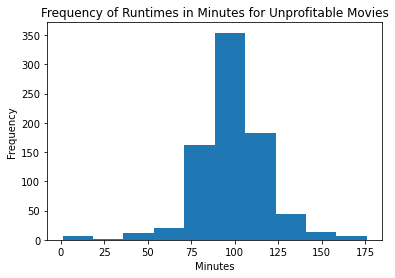

In [63]:
fig, ax = plt.subplots()

ax.hist(unprofitable_movies_df["runtime_minutes"])
ax.set_title("Frequency of Runtimes in Minutes for Unprofitable Movies")
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency");

In [65]:
unprofitable_runtime_mean = unprofitable_movies_df["runtime_minutes"].mean()
unprofitable_runtime_mean

97.91022443890274

In [66]:
unprofitable_runtime_median = unprofitable_movies_df["runtime_minutes"].median()
unprofitable_runtime_median

96.0

In [67]:
##Create 100 most profitable movies
most_profitable_df = profitable_movie_df.sort_values(by = "Estimated Profit", ascending = False)[0:100]
most_profitable_df

,id,release_date,movie,budgets(USD),dom_gross(USD),world_gross(USD),movie_id,genres,runtime_minutes,Estimated Profit,director_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,tt1775309,Horror,93.0,2351345279,Atsushi Wada
18,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,"Action,Adventure,Sci-Fi",149.0,1748134200,Anthony Russo
142,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,tt0369610,"Action,Adventure,Sci-Fi",124.0,1433854864,Colin Trevorrow
272,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,tt2820852,"Action,Crime,Thriller",137.0,1328722794,James Wan
123,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,tt0848228,"Action,Adventure,Sci-Fi",143.0,1292935897,Joss Whedon
...,...,...,...,...,...,...,...,...,...,...,...
866,26,"Mar 22, 2013",The Croods,135000000,187168425,573068425,tt0481499,"Action,Adventure,Animation",98.0,438068425,Chris Sanders
327,81,"May 24, 2019",Aladdin,182000000,246734314,619234314,tt6139732,"Adventure,Comedy,Family",128.0,437234314,Guy Ritchie
762,78,"Mar 29, 2018",Ready Player One,150000000,137690172,579290136,tt1677720,"Action,Adventure,Sci-Fi",140.0,429290136,Steven Spielberg
1045,46,"Oct 28, 2011",Puss in Boots,130000000,149260504,554987477,tt0448694,"Action,Adventure,Animation",90.0,424987477,Chris Miller


In [72]:
most_profitable_runtime_mean = most_profitable_df["runtime_minutes"].mean()
most_profitable_runtime_median = most_profitable_df["runtime_minutes"].median()
print(most_profitable_runtime_mean, most_profitable_runtime_median)

121.06 124.0


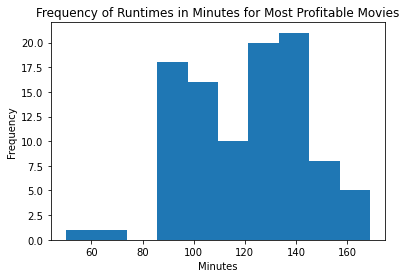

In [74]:
fig, ax = plt.subplots()

ax.hist(most_profitable_df["runtime_minutes"])
ax.set_title("Frequency of Runtimes in Minutes for Most Profitable Movies")
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency");

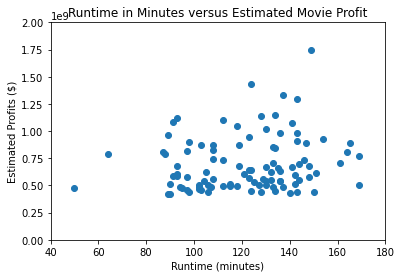

In [97]:
fig, ax = plt.subplots()
x = most_profitable_df["runtime_minutes"]
y = most_profitable_df["Estimated Profit"]
ax.scatter(x, y)
ax.set(xlim = (40, 180), ylim = (0, 2000000000), 
            title = "Runtime in Minutes versus Estimated Movie Profit",
            xlabel = "Runtime (minutes)",
            ylabel = "Estimated Profits ($)");

In [ ]:
#plot least profitable movies and the frequency of runtimes versus most profitable movies and frequency of run times 

In [105]:
import matplotlib.pyplot as plt
import numpy as np

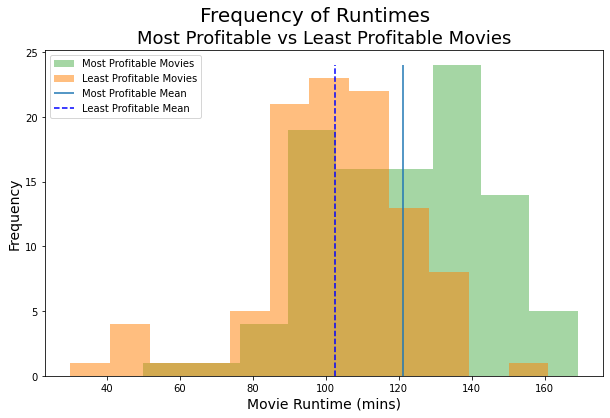

In [145]:
plt.figure(figsize=(10,6))

plt.hist(most_profitable_df["runtime_minutes"], alpha = 0.5, color = "#4daf4a", label = "Most Profitable Movies", bins = "fd")
plt.hist(least_profitable_movies_df["runtime_minutes"], alpha = 0.5, color = "#ff7f00", label = "Least Profitable Movies", bins = "fd")
plt.vlines(most_profitable_runtime_mean, ymin = 0, ymax = 24, label = "Most Profitable Mean")
plt.vlines(least_profitable_runtime_mean, ymin = 0, ymax = 24, color = "blue", linestyle = "dashed", label = "Least Profitable Mean")
plt.title("Most Profitable vs Least Profitable Movies", size=18)
plt.suptitle("Frequency of Runtimes", size=20)
plt.xlabel("Movie Runtime (mins)", size=14)
plt.ylabel("Frequency", size=14)
plt.legend(loc="upper left")
plt.savefig("./Movie_Runtime_Hist_Compare.png");

<Figure size 432x288 with 0 Axes>